# ***Importing Requirements***

### Importing Libraries

In [0]:
!pip3 install mlflow

     |████████████████████████████████| 14.6MB 209kB/s 
     |████████████████████████████████| 1.1MB 50.7MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 460kB 47.1MB/s 
     |████████████████████████████████| 92kB 13.7MB/s 
     |████████████████████████████████| 143kB 58.3MB/s 
     |████████████████████████████████| 471kB 50.9MB/s 
     |████████████████████████████████| 71kB 11.7MB/s 
     |████████████████████████████████| 204kB 52.5MB/s 
  Created wheel for mlflow: filename=mlflow-1.5.0-cp36-none-any.whl size=14783643 sha256=376fb18c9ad39679b3fc5d9202f4a8ffc426564fba376ebde868a63a8a5618fa
  Stored in directory: /root/.cache/pip/wheels/f2/cc/f4/50cf516fb828a49be6929942715516f91061cda44fcf4ea6bd
  Created wheel for alembic: filename=alembic-1.3.3-py2.py3-none-any.whl size=155684 sha256=fcc6f5c2c4b5e59e37f4235928a9934be31268bb855e0862f4b23f0fa92972ae
  Stored in directory: /root/.cache/pip/wheels/12/6a/49/94a4af65af2edbccf9f467c0f4

In [0]:
from __future__ import print_function

import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import keras
import time
import mlflow
import mlflow.keras
import mlflow.tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
%matplotlib inline

### Importing Data



In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Classifier.csv to Classifier.csv
Saving Normal Mode.csv to Normal Mode.csv
Saving Read Mode.csv to Read Mode.csv
Saving Sleep Mode.csv to Sleep Mode.csv
User uploaded file "Classifier.csv" with length 503636 bytes
User uploaded file "Normal Mode.csv" with length 519 bytes
User uploaded file "Read Mode.csv" with length 567 bytes
User uploaded file "Sleep Mode.csv" with length 413 bytes


# ***Classifier***

In [0]:
df = pd.read_csv('Classifier.csv',sep=',')

### Maniplating and Pre-Processing Data

Performing One-Hot Encoding

In [0]:
df['ISleep'] = (df["Mode"] == 0)*1.0
df['IRead'] = (df["Mode"] == 1)*1.0
df['INormal'] = (df["Mode"] == 2)*1.0

df['OSleep'] = (df["Output"] == 0)*1.0
df['ORead'] = (df["Output"] == 1)*1.0
df['ONormal'] = (df["Output"] == 2)*1.0
df['Deactivate'] = (df["Output"] == -1)*1.0

print (df.describe())

               0-1          1-2          2-3          3-4          4-5  \
count  9072.000000  9072.000000  9072.000000  9072.000000  9072.000000   
mean      0.041667     0.041667     0.041667     0.041667     0.041667   
std       0.199837     0.199837     0.199837     0.199837     0.199837   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               5-6          6-7          7-8          8-9         9-10  ...  \
count  9072.000000  9072.000000  9072.000000  9072.000000  9072.000000  ...   
mean      0.041667     0.041667     0.041667     0.041667     0.041667  ...   
std       0.199837     0.199837     0.199837     0.199837     0.199837  ...   
min       0.00000

Setting Parameters

In [0]:
X = df[["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9-10","10-11","11-12","12-13","13-14","14-15","15-16","16-17","17-18","18-19","19-20","20-21","21-22","22-23","23-24","PIR","IRead","ISleep","INormal"]]
y = df[["OSleep", "ORead","ONormal","Deactivate"]]

### Creating and Evaluating Model

In [0]:
keras.backend.clear_session()
model = Sequential()
model.add(Dense(16, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                464       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
Total params: 636
Trainable params: 636
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training Model

In [0]:
#expt_id = mlflow.create_experiment('Classifier')
mlflow.set_experiment('Classifier')

for v in [0.2]:
    for b in [200, 250]:
        for e in [10, 15, 20]:

            keras.backend.clear_session()
            model = Sequential()
            model.add(Dense(16, input_dim=28, activation='relu'))
            model.add(Dense(8, activation='relu'))
            model.add(Dense(4, activation='softmax'))
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

            results = model.fit(X, y, epochs=e, validation_split = v, batch_size = b)
                    
            with mlflow.start_run() as run:
                for i in range(e):

                    mlflow.log_param("Validation_Split", v)
                    mlflow.log_param("Batch_Size", b)
                    mlflow.log_param("Epochs", e)

                    mlflow.log_metric("Training_Loss", results.history['loss'][i])
                    mlflow.log_metric("Validation_Loss", results.history['val_loss'][i])
                    mlflow.log_metric("Training _Accuracy", results.history['accuracy'][i])
                    mlflow.log_metric("Validation_Accuracy", results.history['val_accuracy'][i])


Train on 7257 samples, validate on 1815 samples
Epoch 1/10
7257/7257 [==============================] - 0s 39us/step - loss: 1.3401 - accuracy: 0.3715 - val_loss: 1.2467 - val_accuracy: 0.6942
Epoch 2/10
7257/7257 [==============================] - 0s 11us/step - loss: 1.2351 - accuracy: 0.4862 - val_loss: 1.0605 - val_accuracy: 0.9306
Epoch 3/10
7257/7257 [==============================] - 0s 14us/step - loss: 1.0889 - accuracy: 0.5885 - val_loss: 0.7746 - val_accuracy: 0.9653
Epoch 4/10
7257/7257 [==============================] - 0s 11us/step - loss: 0.8911 - accuracy: 0.6559 - val_loss: 0.5169 - val_accuracy: 1.0000
Epoch 5/10
7257/7257 [==============================] - 0s 11us/step - loss: 0.6845 - accuracy: 0.6818 - val_loss: 0.3282 - val_accuracy: 1.0000
Epoch 6/10
7257/7257 [==============================] - 0s 11us/step - loss: 0.5159 - accuracy: 0.8134 - val_loss: 0.2115 - val_accuracy: 1.0000
Epoch 7/10
7257/7257 [==============================] - 0s 11us/step - loss: 0.38

### Predicting the Output

In [0]:
Prediction = model.predict(X)


Possible_Outputs = ["Sleep","Read","Normal","Deactivate"]

Predicted_class = np.argmax(Prediction,axis=-1)
print (Predicted_class)
print (Possible_Outputs[Predicted_class[9000]])

[0 0 0 ... 3 3 3]
Normal


# ***Intensity Predictor***


### Importing Data

In [0]:
sleep = pd.read_csv('Sleep Mode.csv',sep=',')
read = pd.read_csv('Read Mode.csv',sep=',')
normal = pd.read_csv('Normal Mode.csv',sep=',')

### Visualising Data

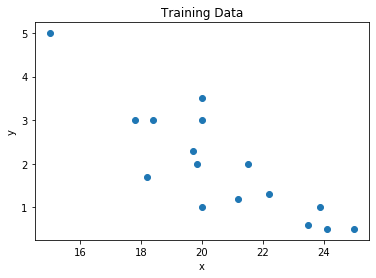

In [0]:
x = sleep["Intensity"]
y = sleep["Output"]
x_sleep = []
y_sleep = []
for i in range(y.shape[0]):
    if (y[i] > 0):
        x_sleep.append(x[i])
        y_sleep.append(y[i])
x_sleep = np.asarray(x_sleep)
y_sleep = np.asarray(y_sleep)

# Plot of Training Data 
plt.scatter(x_sleep, y_sleep) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Training Data") 
plt.show() 

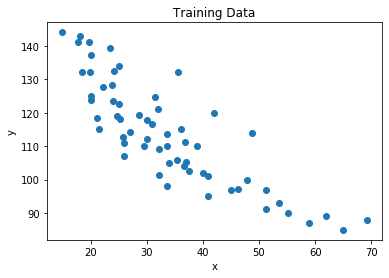

In [0]:
x_read = read["Intensity"]
y_read = read["Output"]

# Plot of Training Data 
plt.scatter(x_read, y_read) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Training Data") 
plt.show() 

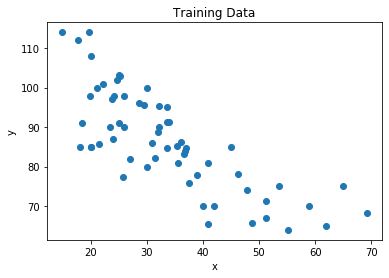

In [0]:
x_normal = normal["Intensity"]
y_normal = normal["Output"]

# Plot of Training Data 
plt.scatter(x_normal, y_normal) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Training Data") 
plt.show() 

### Linear Regression

In [0]:
#expt_id = mlflow.create_experiment('Regressor')
mlflow.set_experiment('Regressor')

def Training(x,y,training_epochs,learning_rate,Mode,Initialise=False,m=0,c=0):
	
	if Initialise:
		q = float(y.max())
		p = -1.35 * float((y.max() - y.min())/(x.max() - x.min()))
	else:
		q = c * float(y.max())
		p = m * float((y.max() - y.min())/(x.max() - x.min()))


	W = tf.Variable(p) 
	b = tf.Variable(q)
	
	X = tf.placeholder("float")
	Y = tf.placeholder("float")

	n = len(x)
	# Hypothesis 
	y_pred = tf.add(tf.multiply(X, W), b)
	
	# Mean Squared Error Cost Function 
	cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

	optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) 

	# Global Variables Initializer 
	init = tf.global_variables_initializer() 

	# Starting the Tensorflow Session Classifer
	with tf.Session() as sess: 
		# Initializing the Variables 
		sess.run(init) 
	
		# Iterating through all the epochs 
		for epoch in range(training_epochs): 
			
			# Feeding each data point into the optimizer using Feed Dictionary 
			for (_x, _y) in zip(x, y): 
				sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
			# Displaying the result after every 50 epochs 
			if (epoch + 1) % 50 == 0: 
				# Calculating the cost a every epoch 
				loss = sess.run(cost, feed_dict = {X : x, Y : y}) 
				print("Epoch", (epoch + 1), ": cost =", loss, "W =", sess.run(W), "b =", sess.run(b))
				
				if Initialise == False:
					with mlflow.start_run() as run:
						mlflow.log_param("Inital_Slope",m)
						mlflow.log_param("Inital_Intercept", c)
						mlflow.log_param("Learning_Rate",learning_rate)
						mlflow.log_param("Mode",Mode)
		
						mlflow.log_metric("Cost", loss)
				

	
		# Storing necessary values to be used outside the Session 
		training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
		weight = sess.run(W) 
		bias = sess.run(b) 

	# Calculating the predictions 
	predictions = weight * x + bias 
	print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

	# Plotting the Results 
	plt.plot(x, y, 'ro', label ='Original data') 
	plt.plot(x, predictions, label ='Fitted line') 
	plt.title('Linear Regression Result') 
	plt.legend() 
	plt.show()

	return weight,bias
	

INFO: 'Regressor' does not exist. Creating a new experiment


### Training Data

Epoch 50 : cost = 0.51039284 W = -0.4514881 b = 10.530095
Epoch 100 : cost = 0.37583727 W = -0.50168973 b = 11.814414
Epoch 150 : cost = 0.35296157 W = -0.5029056 b = 11.887365
Epoch 200 : cost = 0.34955567 W = -0.5026595 b = 11.889216
Epoch 250 : cost = 0.349083 W = -0.50260246 b = 11.888976
Epoch 300 : cost = 0.3490005 W = -0.5025922 b = 11.888927
Training cost = 0.3490005 Weight = -0.5025922 bias = 11.888927 



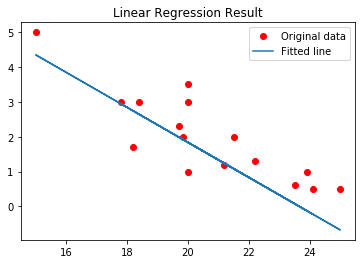

Amount of Time Taken: 5.68


In [0]:
start = time.time()
Weight_sleep,Bias_sleep =  Training(x_sleep,y_sleep,learning_rate = 0.4,Mode='Sleep',training_epochs = 300)
end = time.time()
print('Amount of Time Taken: %.2f' % (end-start))
            

Epoch 50 : cost = 37.980724 W = -1.2702528 b = 156.41179
Epoch 100 : cost = 39.41514 W = -1.3056371 b = 157.81154
Epoch 150 : cost = 39.591785 W = -1.3096203 b = 157.97035
Epoch 200 : cost = 39.613716 W = -1.3101101 b = 157.98993
Epoch 250 : cost = 39.61613 W = -1.3101639 b = 157.99207
Epoch 300 : cost = 39.61655 W = -1.3101733 b = 157.99245
Training cost = 39.61655 Weight = -1.3101733 bias = 157.99245 



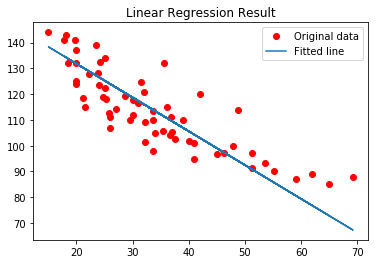

Amount of Time Taken: 10.99
Epoch 50 : cost = 120.325615 W = -0.7737544 b = 152.54971
Epoch 100 : cost = 120.00789 W = -0.77489024 b = 152.56676
Epoch 150 : cost = 120.00611 W = -0.77489895 b = 152.56694
Epoch 200 : cost = 120.005905 W = -0.7749006 b = 152.56699
Epoch 250 : cost = 120.00506 W = -0.77490115 b = 152.56694
Epoch 300 : cost = 120.0051 W = -0.7749011 b = 152.56694
Training cost = 120.0051 Weight = -0.7749011 bias = 152.56694 



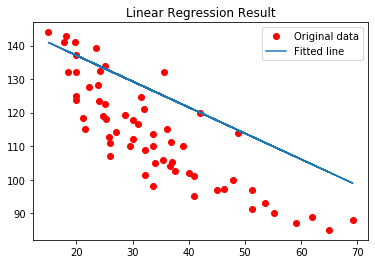

Amount of Time Taken: 12.23
Epoch 50 : cost = 293.02234 W = -0.7356543 b = 160.96526
Epoch 100 : cost = 365.0099 W = -0.46381292 b = 154.05774
Epoch 150 : cost = 364.83545 W = -0.46236858 b = 153.99672
Epoch 200 : cost = 364.7745 W = -0.4624219 b = 153.99625
Epoch 250 : cost = 364.77823 W = -0.46241987 b = 153.99632
Epoch 300 : cost = 364.77884 W = -0.46241963 b = 153.99634
Training cost = 364.77884 Weight = -0.46241963 bias = 153.99634 



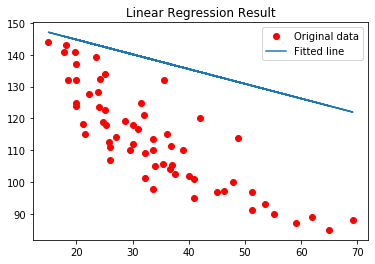

Amount of Time Taken: 12.60
Epoch 50 : cost = 39.585476 W = -1.3094982 b = 157.95805
Epoch 100 : cost = 39.614437 W = -1.3101262 b = 157.9905
Epoch 150 : cost = 39.61587 W = -1.3101581 b = 157.99182
Epoch 200 : cost = 39.61632 W = -1.3101681 b = 157.99225
Epoch 250 : cost = 39.616467 W = -1.3101714 b = 157.99237
Epoch 300 : cost = 39.616467 W = -1.3101714 b = 157.99237
Training cost = 39.616467 Weight = -1.3101714 bias = 157.99237 



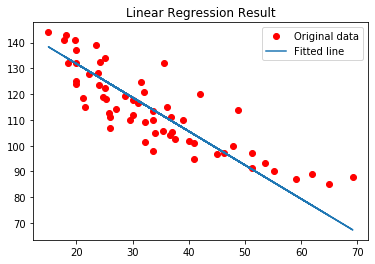

Amount of Time Taken: 12.45
Epoch 50 : cost = 119.7966 W = -0.7756558 b = 152.57845
Epoch 100 : cost = 120.006454 W = -0.7749102 b = 152.56738
Epoch 150 : cost = 120.006454 W = -0.77490854 b = 152.56732
Epoch 200 : cost = 120.00623 W = -0.7749082 b = 152.56729
Epoch 250 : cost = 120.0066 W = -0.7749074 b = 152.56729
Epoch 300 : cost = 120.00667 W = -0.7749073 b = 152.56729
Training cost = 120.00667 Weight = -0.7749073 bias = 152.56729 



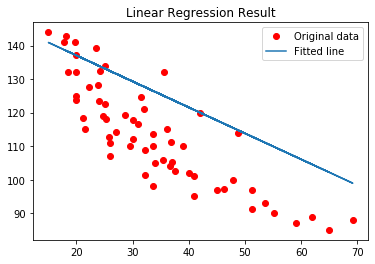

Amount of Time Taken: 12.00
Epoch 50 : cost = 365.10968 W = -0.46233088 b = 154.0064
Epoch 100 : cost = 364.7863 W = -0.46242094 b = 153.99669
Epoch 150 : cost = 364.78082 W = -0.4624187 b = 153.99638
Epoch 200 : cost = 364.7802 W = -0.46241888 b = 153.99637
Epoch 250 : cost = 364.77856 W = -0.4624199 b = 153.99634
Epoch 300 : cost = 364.77927 W = -0.46241954 b = 153.99635
Training cost = 364.77927 Weight = -0.46241954 bias = 153.99635 



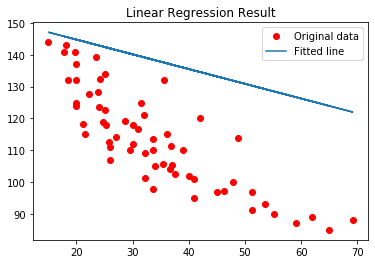

Amount of Time Taken: 11.14
Epoch 50 : cost = 42.969383 W = -1.3736923 b = 160.70789
Epoch 100 : cost = 40.041664 W = -1.3194494 b = 158.36632
Epoch 150 : cost = 39.669388 W = -1.3113481 b = 158.03943
Epoch 200 : cost = 39.622864 W = -1.3103139 b = 157.99806
Epoch 250 : cost = 39.617466 W = -1.3101937 b = 157.99327
Epoch 300 : cost = 39.61723 W = -1.3101883 b = 157.99307
Training cost = 39.61723 Weight = -1.3101883 bias = 157.99307 



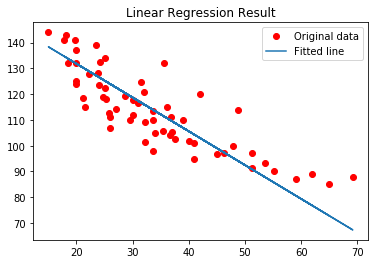

Amount of Time Taken: 11.92
Epoch 50 : cost = 118.76228 W = -0.7793056 b = 152.6317
Epoch 100 : cost = 119.99997 W = -0.77493346 b = 152.56773
Epoch 150 : cost = 120.00826 W = -0.7749121 b = 152.5676
Epoch 200 : cost = 120.00639 W = -0.77490866 b = 152.56732
Epoch 250 : cost = 120.00654 W = -0.77490836 b = 152.56732
Epoch 300 : cost = 120.00639 W = -0.77490866 b = 152.56732
Training cost = 120.00639 Weight = -0.77490866 bias = 152.56732 



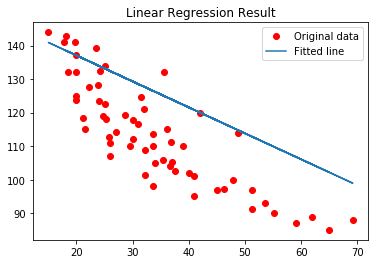

Amount of Time Taken: 11.80
Epoch 50 : cost = 365.25677 W = -0.46236816 b = 154.01373
Epoch 100 : cost = 364.7838 W = -0.4624297 b = 153.99692
Epoch 150 : cost = 364.7822 W = -0.46241963 b = 153.99648
Epoch 200 : cost = 364.779 W = -0.46241942 b = 153.99634
Epoch 250 : cost = 364.77942 W = -0.4624194 b = 153.99635
Epoch 300 : cost = 364.77924 W = -0.4624196 b = 153.99635
Training cost = 364.77924 Weight = -0.4624196 bias = 153.99635 



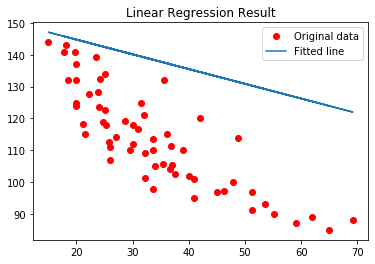

Amount of Time Taken: 11.52
Epoch 50 : cost = 38.41164 W = -1.2815248 b = 156.85756
Epoch 100 : cost = 39.469444 W = -1.3068694 b = 157.86061
Epoch 150 : cost = 39.598515 W = -1.309771 b = 157.9764
Epoch 200 : cost = 39.614517 W = -1.3101279 b = 157.99065
Epoch 250 : cost = 39.61623 W = -1.310166 b = 157.99216
Epoch 300 : cost = 39.616558 W = -1.3101734 b = 157.99245
Training cost = 39.616558 Weight = -1.3101734 bias = 157.99245 



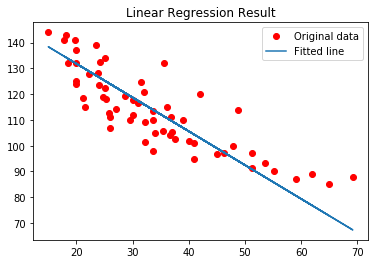

Amount of Time Taken: 11.87
Epoch 50 : cost = 120.16287 W = -0.77436113 b = 152.55937
Epoch 100 : cost = 120.00773 W = -0.77489716 b = 152.567
Epoch 150 : cost = 120.0062 W = -0.77489996 b = 152.56699
Epoch 200 : cost = 120.005905 W = -0.7749006 b = 152.56699
Epoch 250 : cost = 120.00506 W = -0.77490115 b = 152.56694
Epoch 300 : cost = 120.0051 W = -0.7749011 b = 152.56694
Training cost = 120.0051 Weight = -0.7749011 bias = 152.56694 



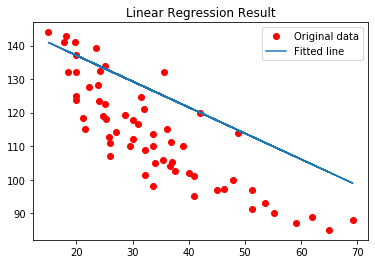

Amount of Time Taken: 12.90
Epoch 50 : cost = 298.42575 W = -0.7282364 b = 160.93863
Epoch 100 : cost = 360.78815 W = -0.46554878 b = 153.95143
Epoch 150 : cost = 364.8288 W = -0.46237493 b = 153.99669
Epoch 200 : cost = 364.7753 W = -0.46242216 b = 153.99629
Epoch 250 : cost = 364.7793 W = -0.46241948 b = 153.99635
Epoch 300 : cost = 364.77924 W = -0.4624196 b = 153.99635
Training cost = 364.77924 Weight = -0.4624196 bias = 153.99635 



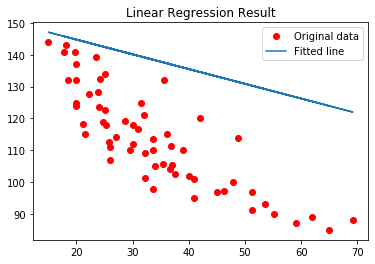

Amount of Time Taken: 12.45
Epoch 50 : cost = 39.647987 W = -1.310873 b = 158.02045
Epoch 100 : cost = 39.620407 W = -1.3102592 b = 157.9959
Epoch 150 : cost = 39.617325 W = -1.3101906 b = 157.99316
Epoch 200 : cost = 39.617138 W = -1.3101864 b = 157.993
Epoch 250 : cost = 39.6171 W = -1.3101853 b = 157.99297
Epoch 300 : cost = 39.617104 W = -1.3101854 b = 157.99297
Training cost = 39.617104 Weight = -1.3101854 bias = 157.99297 



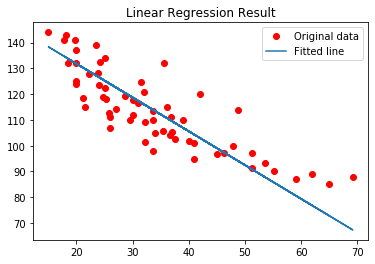

Amount of Time Taken: 12.19
Epoch 50 : cost = 119.75713 W = -0.77582824 b = 152.58171
Epoch 100 : cost = 120.00415 W = -0.7749093 b = 152.56717
Epoch 150 : cost = 120.0062 W = -0.77491075 b = 152.56738
Epoch 200 : cost = 120.00639 W = -0.77490866 b = 152.56732
Epoch 250 : cost = 120.00654 W = -0.77490836 b = 152.56732
Epoch 300 : cost = 120.00639 W = -0.77490866 b = 152.56732
Training cost = 120.00639 Weight = -0.77490866 bias = 152.56732 



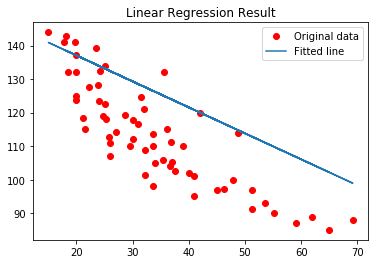

Amount of Time Taken: 12.71
Epoch 50 : cost = 422.78848 W = -0.56208897 b = 159.90398
Epoch 100 : cost = 363.34668 W = -0.46300602 b = 153.96028
Epoch 150 : cost = 364.78232 W = -0.4624138 b = 153.99626
Epoch 200 : cost = 364.778 W = -0.46242052 b = 153.99634
Epoch 250 : cost = 364.77856 W = -0.4624199 b = 153.99634
Epoch 300 : cost = 364.77927 W = -0.46241954 b = 153.99635
Training cost = 364.77927 Weight = -0.46241954 bias = 153.99635 



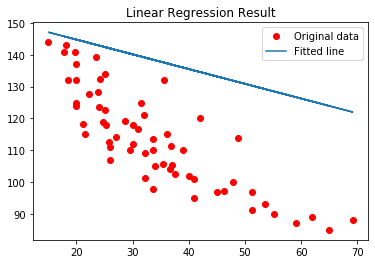

Amount of Time Taken: 13.64
Epoch 50 : cost = 42.15841 W = -1.3602251 b = 160.0969
Epoch 100 : cost = 39.92522 W = -1.3169475 b = 158.26494
Epoch 150 : cost = 39.65475 W = -1.3110231 b = 158.02641
Epoch 200 : cost = 39.621372 W = -1.3102806 b = 157.99677
Epoch 250 : cost = 39.617397 W = -1.3101921 b = 157.99323
Epoch 300 : cost = 39.617218 W = -1.3101882 b = 157.99307
Training cost = 39.617218 Weight = -1.3101882 bias = 157.99307 



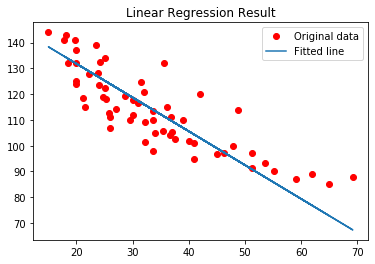

Amount of Time Taken: 14.09
Epoch 50 : cost = 118.986244 W = -0.7785565 b = 152.62173
Epoch 100 : cost = 120.000374 W = -0.77493095 b = 152.56767
Epoch 150 : cost = 120.00842 W = -0.7749118 b = 152.5676
Epoch 200 : cost = 120.00656 W = -0.7749087 b = 152.56734
Epoch 250 : cost = 120.006454 W = -0.77490896 b = 152.56734
Epoch 300 : cost = 120.00659 W = -0.77490866 b = 152.56734
Training cost = 120.00659 Weight = -0.77490866 bias = 152.56734 



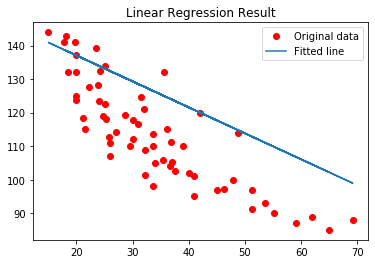

Amount of Time Taken: 12.66
Epoch 50 : cost = 365.2422 W = -0.46239212 b = 154.01404
Epoch 100 : cost = 364.7844 W = -0.46242994 b = 153.99695
Epoch 150 : cost = 364.78168 W = -0.46242017 b = 153.99648
Epoch 200 : cost = 364.77933 W = -0.46241906 b = 153.99634
Epoch 250 : cost = 364.77942 W = -0.4624194 b = 153.99635
Epoch 300 : cost = 364.77924 W = -0.4624196 b = 153.99635
Training cost = 364.77924 Weight = -0.4624196 bias = 153.99635 



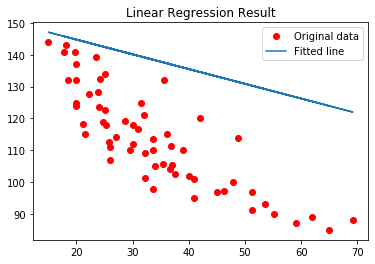

Amount of Time Taken: 12.21
Epoch 50 : cost = 38.420773 W = -1.281757 b = 156.86662
Epoch 100 : cost = 39.470577 W = -1.3068949 b = 157.86163
Epoch 150 : cost = 39.59867 W = -1.3097742 b = 157.97652
Epoch 200 : cost = 39.614574 W = -1.3101292 b = 157.9907
Epoch 250 : cost = 39.61626 W = -1.3101667 b = 157.99219
Epoch 300 : cost = 39.616558 W = -1.3101734 b = 157.99245
Training cost = 39.616558 Weight = -1.3101734 bias = 157.99245 



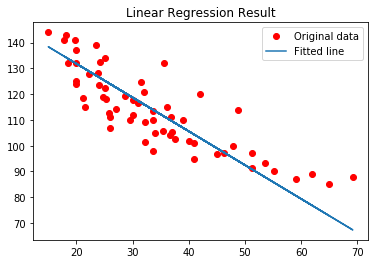

Amount of Time Taken: 13.91
Epoch 50 : cost = 120.15694 W = -0.7743803 b = 152.55962
Epoch 100 : cost = 120.00762 W = -0.77489823 b = 152.56703
Epoch 150 : cost = 120.00618 W = -0.77490044 b = 152.567
Epoch 200 : cost = 120.005905 W = -0.7749006 b = 152.56699
Epoch 250 : cost = 120.00506 W = -0.77490115 b = 152.56694
Epoch 300 : cost = 120.0051 W = -0.7749011 b = 152.56694
Training cost = 120.0051 Weight = -0.7749011 bias = 152.56694 



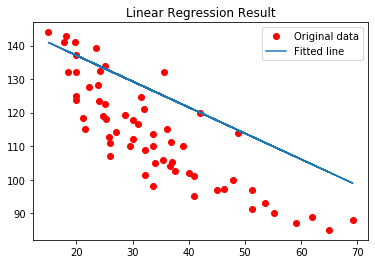

Amount of Time Taken: 13.75
Epoch 50 : cost = 299.194 W = -0.7271787 b = 160.93452
Epoch 100 : cost = 360.40466 W = -0.46569118 b = 153.94115
Epoch 150 : cost = 364.8258 W = -0.4623757 b = 153.9966
Epoch 200 : cost = 364.7747 W = -0.46242243 b = 153.99628
Epoch 250 : cost = 364.77948 W = -0.4624193 b = 153.99635
Epoch 300 : cost = 364.77924 W = -0.4624196 b = 153.99635
Training cost = 364.77924 Weight = -0.4624196 bias = 153.99635 



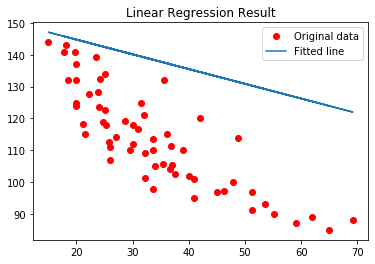

Amount of Time Taken: 14.88
Epoch 50 : cost = 39.665108 W = -1.3112526 b = 158.03581
Epoch 100 : cost = 39.62221 W = -1.3102995 b = 157.9975
Epoch 150 : cost = 39.617397 W = -1.3101921 b = 157.99323
Epoch 200 : cost = 39.617138 W = -1.3101864 b = 157.993
Epoch 250 : cost = 39.6171 W = -1.3101853 b = 157.99297
Epoch 300 : cost = 39.617104 W = -1.3101854 b = 157.99297
Training cost = 39.617104 Weight = -1.3101854 bias = 157.99297 



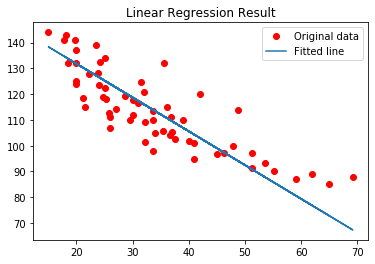

Amount of Time Taken: 13.88
Epoch 50 : cost = 119.75335 W = -0.77584505 b = 152.58203
Epoch 100 : cost = 120.00408 W = -0.77490944 b = 152.56717
Epoch 150 : cost = 120.00612 W = -0.7749109 b = 152.56738
Epoch 200 : cost = 120.00639 W = -0.77490866 b = 152.56732
Epoch 250 : cost = 120.00654 W = -0.77490836 b = 152.56732
Epoch 300 : cost = 120.00639 W = -0.77490866 b = 152.56732
Training cost = 120.00639 Weight = -0.77490866 bias = 152.56732 



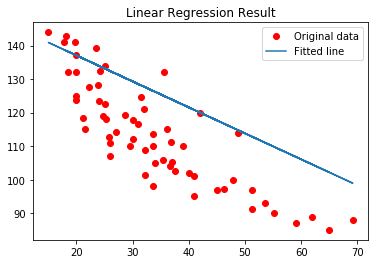

Amount of Time Taken: 13.60
Epoch 50 : cost = 449.4918 W = -0.52663255 b = 159.57301
Epoch 100 : cost = 363.79745 W = -0.46279058 b = 153.97049
Epoch 150 : cost = 364.78116 W = -0.46241552 b = 153.99628
Epoch 200 : cost = 364.7777 W = -0.46242043 b = 153.99632
Epoch 250 : cost = 364.77856 W = -0.4624199 b = 153.99634
Epoch 300 : cost = 364.77927 W = -0.46241954 b = 153.99635
Training cost = 364.77927 Weight = -0.46241954 bias = 153.99635 



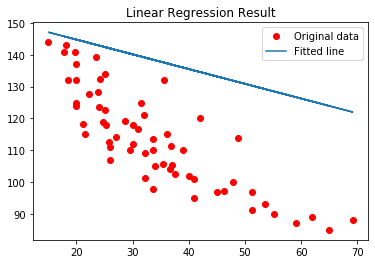

Amount of Time Taken: 13.12
Epoch 50 : cost = 42.154785 W = -1.3601623 b = 160.09412
Epoch 100 : cost = 39.924824 W = -1.3169389 b = 158.26459
Epoch 150 : cost = 39.654713 W = -1.3110223 b = 158.02638
Epoch 200 : cost = 39.621353 W = -1.3102802 b = 157.99675
Epoch 250 : cost = 39.617374 W = -1.3101918 b = 157.99321
Epoch 300 : cost = 39.617218 W = -1.3101882 b = 157.99307
Training cost = 39.617218 Weight = -1.3101882 bias = 157.99307 



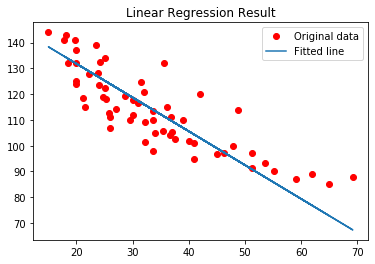

Amount of Time Taken: 12.25
Epoch 50 : cost = 118.98282 W = -0.7785692 b = 152.62193
Epoch 100 : cost = 120.000435 W = -0.77493083 b = 152.56767
Epoch 150 : cost = 120.00823 W = -0.7749118 b = 152.56758
Epoch 200 : cost = 120.006645 W = -0.77490896 b = 152.56735
Epoch 250 : cost = 120.0066 W = -0.7749091 b = 152.56735
Epoch 300 : cost = 120.00655 W = -0.77490914 b = 152.56735
Training cost = 120.00655 Weight = -0.77490914 bias = 152.56735 



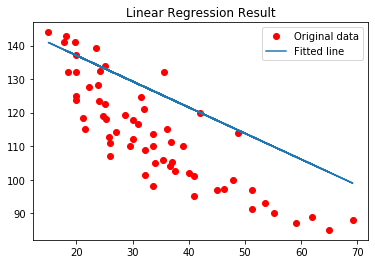

Amount of Time Taken: 13.07
Epoch 50 : cost = 365.24557 W = -0.46239376 b = 154.01424
Epoch 100 : cost = 364.78253 W = -0.4624311 b = 153.99692
Epoch 150 : cost = 364.78204 W = -0.46241984 b = 153.99648
Epoch 200 : cost = 364.77908 W = -0.46241933 b = 153.99634
Epoch 250 : cost = 364.77856 W = -0.4624199 b = 153.99634
Epoch 300 : cost = 364.77927 W = -0.46241954 b = 153.99635
Training cost = 364.77927 Weight = -0.46241954 bias = 153.99635 



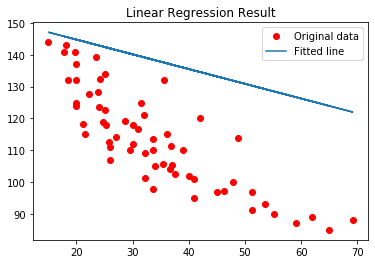

Amount of Time Taken: 13.94
Epoch 50 : cost = 38.427887 W = -1.2819377 b = 156.8737
Epoch 100 : cost = 39.47134 W = -1.3069123 b = 157.86234
Epoch 150 : cost = 39.598736 W = -1.3097757 b = 157.9766
Epoch 200 : cost = 39.61458 W = -1.3101293 b = 157.9907
Epoch 250 : cost = 39.61626 W = -1.3101667 b = 157.99219
Epoch 300 : cost = 39.616558 W = -1.3101734 b = 157.99245
Training cost = 39.616558 Weight = -1.3101734 bias = 157.99245 



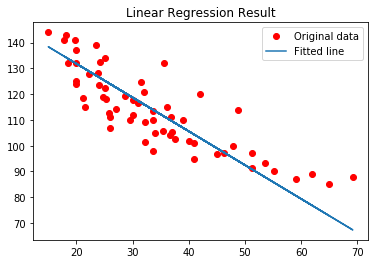

Amount of Time Taken: 13.15
Epoch 50 : cost = 120.15152 W = -0.7743997 b = 152.5599
Epoch 100 : cost = 120.00749 W = -0.77489847 b = 152.56703
Epoch 150 : cost = 120.00613 W = -0.77490056 b = 152.567
Epoch 200 : cost = 120.005905 W = -0.7749006 b = 152.56699
Epoch 250 : cost = 120.00506 W = -0.77490115 b = 152.56694
Epoch 300 : cost = 120.0051 W = -0.7749011 b = 152.56694
Training cost = 120.0051 Weight = -0.7749011 bias = 152.56694 



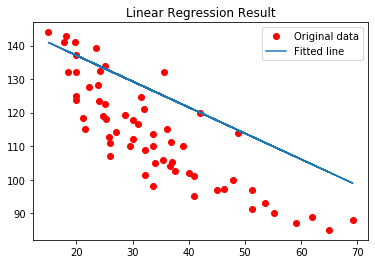

Amount of Time Taken: 13.64
Epoch 50 : cost = 300.88095 W = -0.72486573 b = 160.92567
Epoch 100 : cost = 359.70016 W = -0.4659416 b = 153.92181
Epoch 150 : cost = 364.8261 W = -0.46237624 b = 153.99663
Epoch 200 : cost = 364.77664 W = -0.46242157 b = 153.99632
Epoch 250 : cost = 364.77948 W = -0.4624193 b = 153.99635
Epoch 300 : cost = 364.77924 W = -0.4624196 b = 153.99635
Training cost = 364.77924 Weight = -0.4624196 bias = 153.99635 



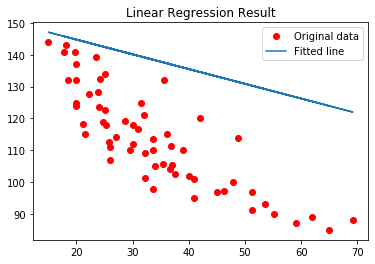

Amount of Time Taken: 12.82
Epoch 50 : cost = 39.685856 W = -1.311712 b = 158.05437
Epoch 100 : cost = 39.62449 W = -1.3103503 b = 157.9995
Epoch 150 : cost = 39.617554 W = -1.3101954 b = 157.99333
Epoch 200 : cost = 39.617138 W = -1.3101864 b = 157.993
Epoch 250 : cost = 39.617107 W = -1.3101856 b = 157.99298
Epoch 300 : cost = 39.617107 W = -1.3101856 b = 157.99298
Training cost = 39.617107 Weight = -1.3101856 bias = 157.99298 



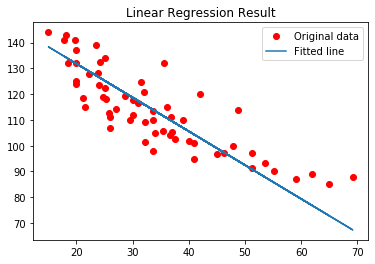

Amount of Time Taken: 12.68
Epoch 50 : cost = 119.74576 W = -0.7758715 b = 152.58241
Epoch 100 : cost = 120.00415 W = -0.7749089 b = 152.56715
Epoch 150 : cost = 120.006325 W = -0.77491087 b = 152.5674
Epoch 200 : cost = 120.00639 W = -0.77490866 b = 152.56732
Epoch 250 : cost = 120.00654 W = -0.77490836 b = 152.56732
Epoch 300 : cost = 120.00639 W = -0.77490866 b = 152.56732
Training cost = 120.00639 Weight = -0.77490866 bias = 152.56732 



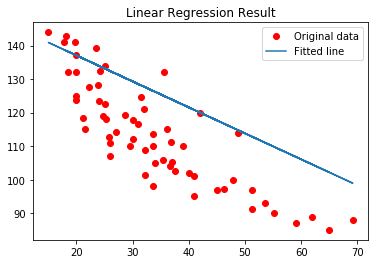

Amount of Time Taken: 13.51
Epoch 50 : cost = 391.83514 W = -0.45232567 b = 154.6911
Epoch 100 : cost = 364.86884 W = -0.46234474 b = 153.99718
Epoch 150 : cost = 364.77737 W = -0.4624204 b = 153.9963
Epoch 200 : cost = 364.78015 W = -0.462419 b = 153.99637
Epoch 250 : cost = 364.77863 W = -0.4624198 b = 153.99634
Epoch 300 : cost = 364.77884 W = -0.46241963 b = 153.99634
Training cost = 364.77884 Weight = -0.46241963 bias = 153.99634 



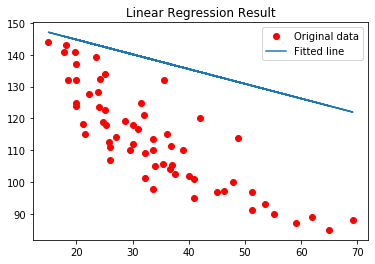

Amount of Time Taken: 14.00
Epoch 50 : cost = 42.15521 W = -1.3601695 b = 160.09444
Epoch 100 : cost = 39.924797 W = -1.3169385 b = 158.26457
Epoch 150 : cost = 39.654713 W = -1.3110223 b = 158.02638
Epoch 200 : cost = 39.621353 W = -1.3102802 b = 157.99675
Epoch 250 : cost = 39.617374 W = -1.3101918 b = 157.99321
Epoch 300 : cost = 39.617218 W = -1.3101882 b = 157.99307
Training cost = 39.617218 Weight = -1.3101882 bias = 157.99307 



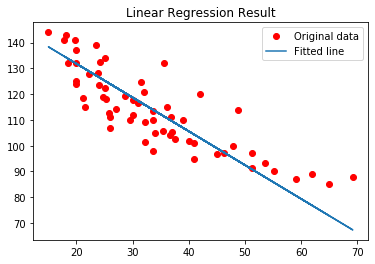

Amount of Time Taken: 13.80
Epoch 50 : cost = 118.97501 W = -0.77859956 b = 152.62244
Epoch 100 : cost = 120.0004 W = -0.7749301 b = 152.56764
Epoch 150 : cost = 120.00842 W = -0.7749118 b = 152.5676
Epoch 200 : cost = 120.00656 W = -0.7749087 b = 152.56734
Epoch 250 : cost = 120.006454 W = -0.77490896 b = 152.56734
Epoch 300 : cost = 120.00659 W = -0.77490866 b = 152.56734
Training cost = 120.00659 Weight = -0.77490866 bias = 152.56734 



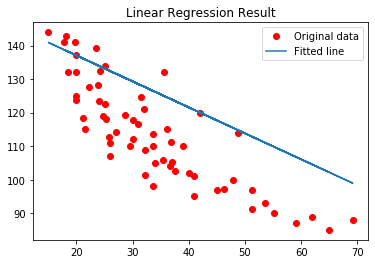

Amount of Time Taken: 14.04
Epoch 50 : cost = 365.2468 W = -0.46239483 b = 154.01433
Epoch 100 : cost = 364.78287 W = -0.4624312 b = 153.99693
Epoch 150 : cost = 364.78143 W = -0.4624201 b = 153.99646
Epoch 200 : cost = 364.77917 W = -0.46241924 b = 153.99634
Epoch 250 : cost = 364.77954 W = -0.46241927 b = 153.99635
Epoch 300 : cost = 364.77884 W = -0.46241963 b = 153.99634
Training cost = 364.77884 Weight = -0.46241963 bias = 153.99634 



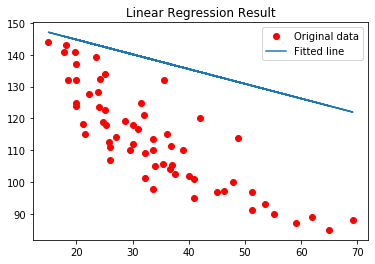

Amount of Time Taken: 13.55
Epoch 50 : cost = 38.433113 W = -1.28207 b = 156.87881
Epoch 100 : cost = 39.47212 W = -1.3069297 b = 157.86305
Epoch 150 : cost = 39.598843 W = -1.309778 b = 157.97668
Epoch 200 : cost = 39.61458 W = -1.3101293 b = 157.9907
Epoch 250 : cost = 39.61626 W = -1.3101667 b = 157.99219
Epoch 300 : cost = 39.616558 W = -1.3101734 b = 157.99245
Training cost = 39.616558 Weight = -1.3101734 bias = 157.99245 



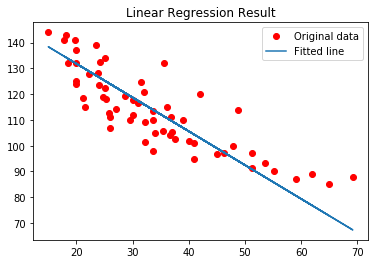

Amount of Time Taken: 14.17
Epoch 50 : cost = 120.14949 W = -0.7744094 b = 152.5601
Epoch 100 : cost = 120.00733 W = -0.7748984 b = 152.56702
Epoch 150 : cost = 120.00611 W = -0.7749006 b = 152.567
Epoch 200 : cost = 120.005905 W = -0.7749006 b = 152.56699
Epoch 250 : cost = 120.00506 W = -0.77490115 b = 152.56694
Epoch 300 : cost = 120.0051 W = -0.7749011 b = 152.56694
Training cost = 120.0051 Weight = -0.7749011 bias = 152.56694 



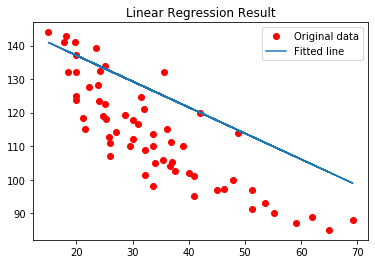

Amount of Time Taken: 14.48
Epoch 50 : cost = 303.42862 W = -0.7213622 b = 160.91147
Epoch 100 : cost = 358.94272 W = -0.4661768 b = 153.89972
Epoch 150 : cost = 364.82028 W = -0.4623801 b = 153.99654
Epoch 200 : cost = 364.77722 W = -0.4624214 b = 153.99634
Epoch 250 : cost = 364.7793 W = -0.46241948 b = 153.99635
Epoch 300 : cost = 364.77924 W = -0.4624196 b = 153.99635
Training cost = 364.77924 Weight = -0.4624196 bias = 153.99635 



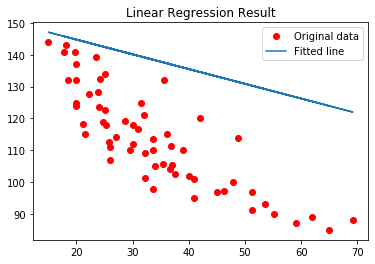

Amount of Time Taken: 14.08
Epoch 50 : cost = 39.707832 W = -1.3121974 b = 158.07397
Epoch 100 : cost = 39.627064 W = -1.3104074 b = 158.0018
Epoch 150 : cost = 39.617718 W = -1.3101993 b = 157.99348
Epoch 200 : cost = 39.61716 W = -1.3101867 b = 157.99301
Epoch 250 : cost = 39.617123 W = -1.3101857 b = 157.99298
Epoch 300 : cost = 39.617107 W = -1.3101856 b = 157.99298
Training cost = 39.617107 Weight = -1.3101856 bias = 157.99298 



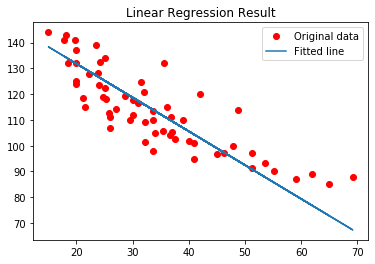

Amount of Time Taken: 13.28
Epoch 50 : cost = 119.73598 W = -0.7759063 b = 152.58293
Epoch 100 : cost = 120.004196 W = -0.7749092 b = 152.56717
Epoch 150 : cost = 120.00616 W = -0.7749112 b = 152.5674
Epoch 200 : cost = 120.00639 W = -0.77490866 b = 152.56732
Epoch 250 : cost = 120.00654 W = -0.77490836 b = 152.56732
Epoch 300 : cost = 120.00639 W = -0.77490866 b = 152.56732
Training cost = 120.00639 Weight = -0.77490866 bias = 152.56732 



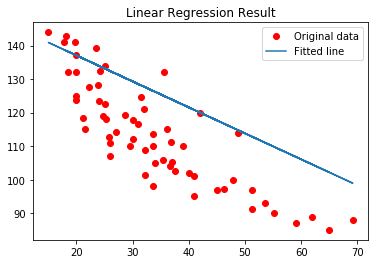

Amount of Time Taken: 13.65
Epoch 50 : cost = 353.87234 W = -0.46907547 b = 153.80037
Epoch 100 : cost = 364.82642 W = -0.46238816 b = 153.99709
Epoch 150 : cost = 364.7816 W = -0.4624191 b = 153.99643
Epoch 200 : cost = 364.78018 W = -0.4624194 b = 153.99638
Epoch 250 : cost = 364.77853 W = -0.46241996 b = 153.99634
Epoch 300 : cost = 364.77893 W = -0.4624195 b = 153.99634
Training cost = 364.77893 Weight = -0.4624195 bias = 153.99634 



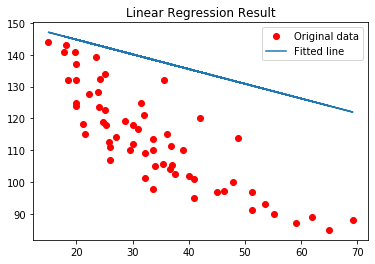

Amount of Time Taken: 13.95
Epoch 50 : cost = 42.166092 W = -1.3603588 b = 160.10277
Epoch 100 : cost = 39.926254 W = -1.31697 b = 158.26584
Epoch 150 : cost = 39.654976 W = -1.3110281 b = 158.02663
Epoch 200 : cost = 39.6214 W = -1.3102813 b = 157.9968
Epoch 250 : cost = 39.617397 W = -1.3101921 b = 157.99323
Epoch 300 : cost = 39.617218 W = -1.3101882 b = 157.99307
Training cost = 39.617218 Weight = -1.3101882 bias = 157.99307 



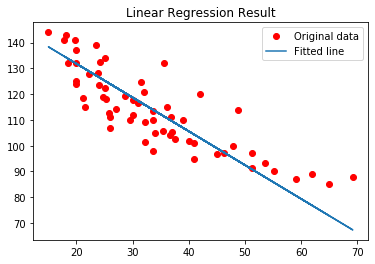

Amount of Time Taken: 14.04
Epoch 50 : cost = 118.96272 W = -0.7786378 b = 152.62288
Epoch 100 : cost = 119.999954 W = -0.77492976 b = 152.5676
Epoch 150 : cost = 120.00842 W = -0.7749118 b = 152.5676
Epoch 200 : cost = 120.00656 W = -0.7749087 b = 152.56734
Epoch 250 : cost = 120.006454 W = -0.77490896 b = 152.56734
Epoch 300 : cost = 120.00659 W = -0.77490866 b = 152.56734
Training cost = 120.00659 Weight = -0.77490866 bias = 152.56734 



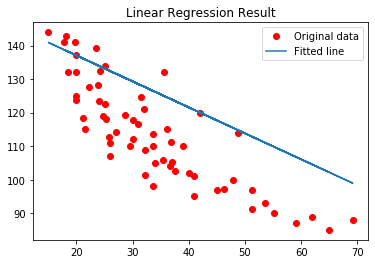

Amount of Time Taken: 13.99
Epoch 50 : cost = 365.24347 W = -0.4623977 b = 154.0143
Epoch 100 : cost = 364.7838 W = -0.46243054 b = 153.99695
Epoch 150 : cost = 364.78207 W = -0.46241975 b = 153.99648
Epoch 200 : cost = 364.77908 W = -0.46241933 b = 153.99634
Epoch 250 : cost = 364.77856 W = -0.4624199 b = 153.99634
Epoch 300 : cost = 364.77927 W = -0.46241954 b = 153.99635
Training cost = 364.77927 Weight = -0.46241954 bias = 153.99635 



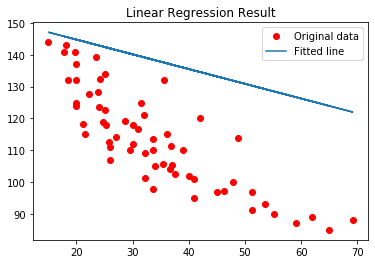

Amount of Time Taken: 14.15


In [0]:
for i in [1.15, -1.25, -1.35, -1.45, -1.55]:
    for j in [1, 1.1, 1.2]:
        for lr in [0.1, 0.3, 0.5]:
                        
            start = time.time()
            Weight_read,Bias_read =  Training(x_read,y_read,learning_rate = lr,Mode='Read',training_epochs = 300,Initialise=False,m=i,c=j)
            end = time.time()
            print('Amount of Time Taken: %.2f' % (end-start))

Epoch 50 : cost = 52.478874 W = -0.5835831 b = 112.378
Epoch 100 : cost = 52.575317 W = -0.58436066 b = 112.4236
Epoch 150 : cost = 52.580692 W = -0.5844312 b = 112.427185
Epoch 200 : cost = 52.580925 W = -0.58443195 b = 112.42725
Epoch 250 : cost = 52.58101 W = -0.5844334 b = 112.42732
Epoch 300 : cost = 52.581043 W = -0.58443344 b = 112.42733
Training cost = 52.581043 Weight = -0.58443344 bias = 112.42733 



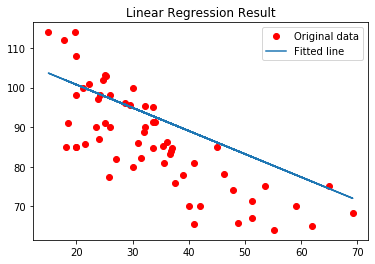

Amount of Time Taken: 13.71
Epoch 50 : cost = 30.621904 W = -0.8123352 b = 113.983185
Epoch 100 : cost = 30.620914 W = -0.8123474 b = 113.96471
Epoch 150 : cost = 30.620892 W = -0.812347 b = 113.96425
Epoch 200 : cost = 30.620888 W = -0.81234705 b = 113.96418
Epoch 250 : cost = 30.620888 W = -0.81234705 b = 113.96418
Epoch 300 : cost = 30.62089 W = -0.81234694 b = 113.96418
Training cost = 30.62089 Weight = -0.81234694 bias = 113.96418 



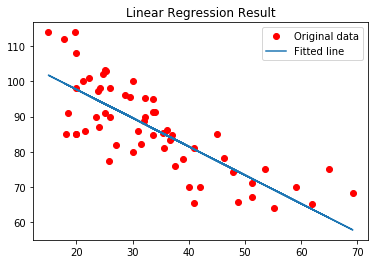

Amount of Time Taken: 14.02
Epoch 50 : cost = 45.56237 W = -0.58592534 b = 111.22663
Epoch 100 : cost = 45.588093 W = -0.58573806 b = 111.22438
Epoch 150 : cost = 45.589127 W = -0.5857304 b = 111.22428
Epoch 200 : cost = 45.58914 W = -0.58573025 b = 111.22428
Epoch 250 : cost = 45.58914 W = -0.5857299 b = 111.224266
Epoch 300 : cost = 45.58913 W = -0.58572996 b = 111.224266
Training cost = 45.58913 Weight = -0.58572996 bias = 111.224266 



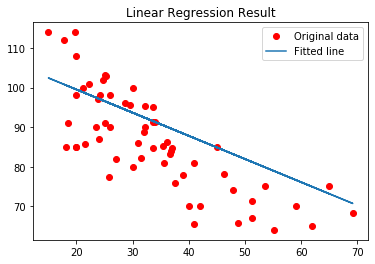

Amount of Time Taken: 15.53
Epoch 50 : cost = 53.34271 W = -0.6053651 b = 113.348495
Epoch 100 : cost = 52.649235 W = -0.5857936 b = 112.49076
Epoch 150 : cost = 52.586887 W = -0.5845409 b = 112.43242
Epoch 200 : cost = 52.58167 W = -0.5844494 b = 112.42805
Epoch 250 : cost = 52.581024 W = -0.5844363 b = 112.42744
Epoch 300 : cost = 52.58105 W = -0.5844362 b = 112.42744
Training cost = 52.58105 Weight = -0.5844362 bias = 112.42744 



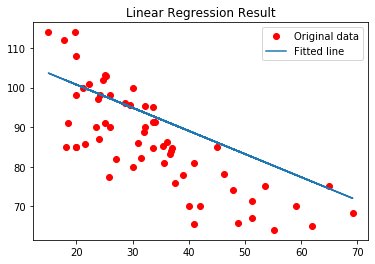

Amount of Time Taken: 14.83
Epoch 50 : cost = 30.633213 W = -0.8116075 b = 114.08132
Epoch 100 : cost = 30.621044 W = -0.8123398 b = 113.96802
Epoch 150 : cost = 30.620886 W = -0.8123466 b = 113.96428
Epoch 200 : cost = 30.620884 W = -0.81234694 b = 113.96417
Epoch 250 : cost = 30.620888 W = -0.81234664 b = 113.96418
Epoch 300 : cost = 30.620888 W = -0.8123467 b = 113.96418
Training cost = 30.620888 Weight = -0.8123467 bias = 113.96418 



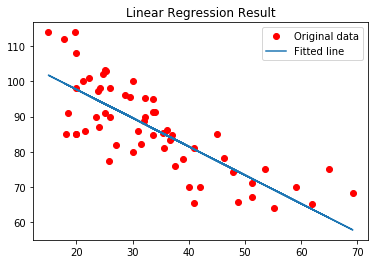

Amount of Time Taken: 14.40
Epoch 50 : cost = 45.570755 W = -0.5864027 b = 111.2473
Epoch 100 : cost = 45.588844 W = -0.5857481 b = 111.22493
Epoch 150 : cost = 45.5894 W = -0.5857316 b = 111.22439
Epoch 200 : cost = 45.589127 W = -0.5857304 b = 111.22428
Epoch 250 : cost = 45.589066 W = -0.5857301 b = 111.22426
Epoch 300 : cost = 45.58904 W = -0.5857302 b = 111.22426
Training cost = 45.58904 Weight = -0.5857302 bias = 111.22426 



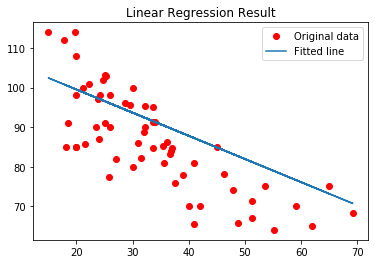

Amount of Time Taken: 13.75
Epoch 50 : cost = 54.070946 W = -0.63880867 b = 114.71169
Epoch 100 : cost = 52.727837 W = -0.5877288 b = 112.57789
Epoch 150 : cost = 52.593857 W = -0.5846724 b = 112.438614
Epoch 200 : cost = 52.5822 W = -0.58445907 b = 112.428505
Epoch 250 : cost = 52.581123 W = -0.58443785 b = 112.42751
Epoch 300 : cost = 52.58105 W = -0.5844362 b = 112.42744
Training cost = 52.58105 Weight = -0.5844362 bias = 112.42744 



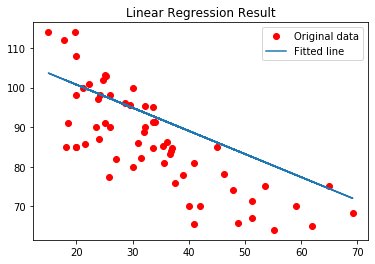

Amount of Time Taken: 14.49
Epoch 50 : cost = 30.672344 W = -0.809047 b = 114.18418
Epoch 100 : cost = 30.621267 W = -0.8123257 b = 113.97334
Epoch 150 : cost = 30.620886 W = -0.8123459 b = 113.96429
Epoch 200 : cost = 30.620884 W = -0.8123471 b = 113.964165
Epoch 250 : cost = 30.620888 W = -0.81234664 b = 113.96418
Epoch 300 : cost = 30.620888 W = -0.8123467 b = 113.96418
Training cost = 30.620888 Weight = -0.8123467 bias = 113.96418 



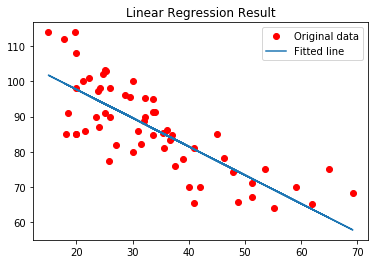

Amount of Time Taken: 14.26
Epoch 50 : cost = 45.45144 W = -0.5892335 b = 111.33557
Epoch 100 : cost = 45.59021 W = -0.58579946 b = 111.22725
Epoch 150 : cost = 45.58924 W = -0.5857311 b = 111.224335
Epoch 200 : cost = 45.58917 W = -0.5857305 b = 111.2243
Epoch 250 : cost = 45.589115 W = -0.58573 b = 111.224266
Epoch 300 : cost = 45.589115 W = -0.58573 b = 111.224266
Training cost = 45.589115 Weight = -0.58573 bias = 111.224266 



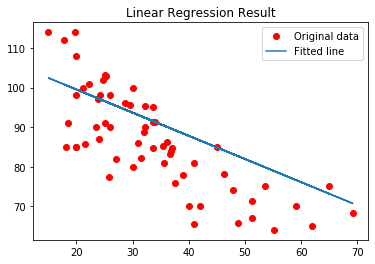

Amount of Time Taken: 13.72
Epoch 50 : cost = 52.7599 W = -0.58784276 b = 112.58741
Epoch 100 : cost = 52.59511 W = -0.5846861 b = 112.43935
Epoch 150 : cost = 52.582302 W = -0.5844594 b = 112.428535
Epoch 200 : cost = 52.581142 W = -0.58443797 b = 112.42752
Epoch 250 : cost = 52.58102 W = -0.5844357 b = 112.427414
Epoch 300 : cost = 52.581036 W = -0.58443564 b = 112.427414
Training cost = 52.581036 Weight = -0.58443564 bias = 112.427414 



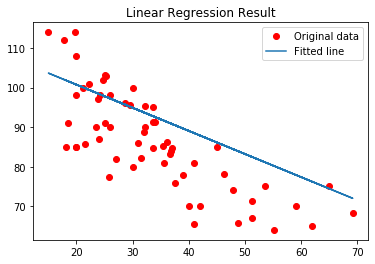

Amount of Time Taken: 13.93
Epoch 50 : cost = 30.621143 W = -0.81237924 b = 113.96667
Epoch 100 : cost = 30.620901 W = -0.8123486 b = 113.964325
Epoch 150 : cost = 30.620886 W = -0.8123472 b = 113.96417
Epoch 200 : cost = 30.620892 W = -0.8123469 b = 113.96417
Epoch 250 : cost = 30.620888 W = -0.81234705 b = 113.96418
Epoch 300 : cost = 30.62089 W = -0.81234694 b = 113.96418
Training cost = 30.62089 Weight = -0.81234694 bias = 113.96418 



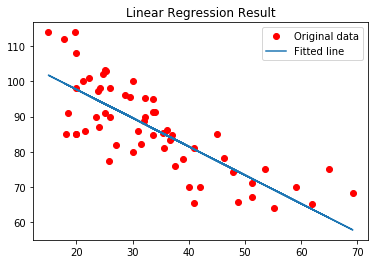

Amount of Time Taken: 14.43
Epoch 50 : cost = 45.561253 W = -0.58593446 b = 111.22677
Epoch 100 : cost = 45.58799 W = -0.58573765 b = 111.22434
Epoch 150 : cost = 45.589157 W = -0.5857308 b = 111.224304
Epoch 200 : cost = 45.589127 W = -0.5857304 b = 111.22428
Epoch 250 : cost = 45.58914 W = -0.5857299 b = 111.224266
Epoch 300 : cost = 45.58913 W = -0.58572996 b = 111.224266
Training cost = 45.58913 Weight = -0.58572996 bias = 111.224266 



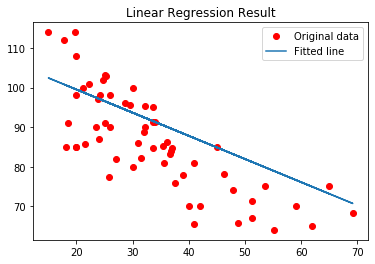

Amount of Time Taken: 15.43
Epoch 50 : cost = 53.450634 W = -0.6045883 b = 113.33585
Epoch 100 : cost = 52.652184 W = -0.58578926 b = 112.491066
Epoch 150 : cost = 52.58697 W = -0.5845415 b = 112.43246
Epoch 200 : cost = 52.581684 W = -0.5844492 b = 112.42804
Epoch 250 : cost = 52.581024 W = -0.5844363 b = 112.42744
Epoch 300 : cost = 52.58105 W = -0.5844362 b = 112.42744
Training cost = 52.58105 Weight = -0.5844362 bias = 112.42744 



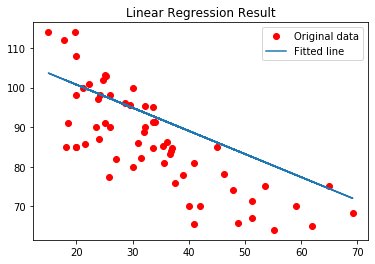

Amount of Time Taken: 15.09
Epoch 50 : cost = 30.630064 W = -0.8118107 b = 114.06357
Epoch 100 : cost = 30.62101 W = -0.81234115 b = 113.96722
Epoch 150 : cost = 30.620895 W = -0.8123467 b = 113.96431
Epoch 200 : cost = 30.620884 W = -0.81234694 b = 113.96417
Epoch 250 : cost = 30.620888 W = -0.81234664 b = 113.96418
Epoch 300 : cost = 30.620888 W = -0.8123467 b = 113.96418
Training cost = 30.620888 Weight = -0.8123467 bias = 113.96418 



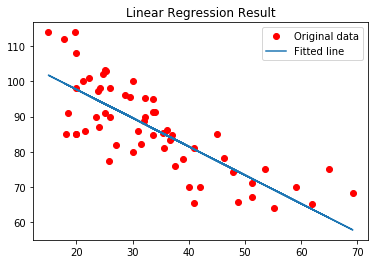

Amount of Time Taken: 14.27
Epoch 50 : cost = 45.566517 W = -0.5861701 b = 111.2372
Epoch 100 : cost = 45.588314 W = -0.58574367 b = 111.22465
Epoch 150 : cost = 45.589314 W = -0.58573073 b = 111.224335
Epoch 200 : cost = 45.58916 W = -0.58573014 b = 111.22428
Epoch 250 : cost = 45.58913 W = -0.58572996 b = 111.224266
Epoch 300 : cost = 45.58915 W = -0.58572966 b = 111.22426
Training cost = 45.58915 Weight = -0.58572966 bias = 111.22426 



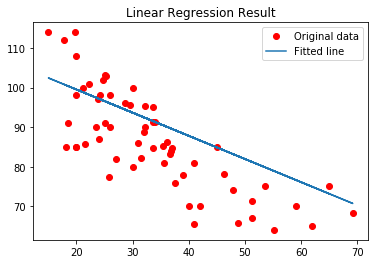

Amount of Time Taken: 13.88
Epoch 50 : cost = 54.110252 W = -0.63022834 b = 114.39951
Epoch 100 : cost = 52.716236 W = -0.5872937 b = 112.55929
Epoch 150 : cost = 52.592476 W = -0.5846437 b = 112.43729
Epoch 200 : cost = 52.582066 W = -0.58445686 b = 112.4284
Epoch 250 : cost = 52.581104 W = -0.58443713 b = 112.42748
Epoch 300 : cost = 52.58105 W = -0.5844362 b = 112.42744
Training cost = 52.58105 Weight = -0.5844362 bias = 112.42744 



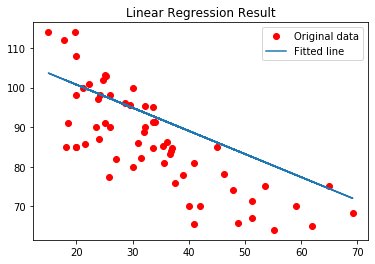

Amount of Time Taken: 14.67
Epoch 50 : cost = 30.655495 W = -0.8101166 b = 114.15424
Epoch 100 : cost = 30.621183 W = -0.81233025 b = 113.97145
Epoch 150 : cost = 30.620888 W = -0.81234676 b = 113.9643
Epoch 200 : cost = 30.620884 W = -0.81234705 b = 113.96417
Epoch 250 : cost = 30.620888 W = -0.81234705 b = 113.96418
Epoch 300 : cost = 30.62089 W = -0.81234694 b = 113.96418
Training cost = 30.62089 Weight = -0.81234694 bias = 113.96418 



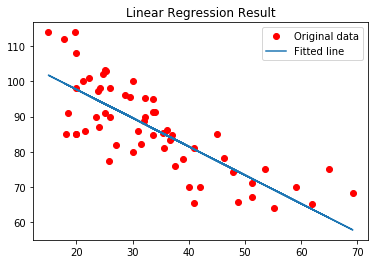

Amount of Time Taken: 13.07
Epoch 50 : cost = 45.56217 W = -0.58701134 b = 111.269745
Epoch 100 : cost = 45.588966 W = -0.5857605 b = 111.22545
Epoch 150 : cost = 45.589607 W = -0.58573115 b = 111.22441
Epoch 200 : cost = 45.589153 W = -0.58573043 b = 111.22429
Epoch 250 : cost = 45.589115 W = -0.58573 b = 111.224266
Epoch 300 : cost = 45.589115 W = -0.58573 b = 111.224266
Training cost = 45.589115 Weight = -0.58573 bias = 111.224266 



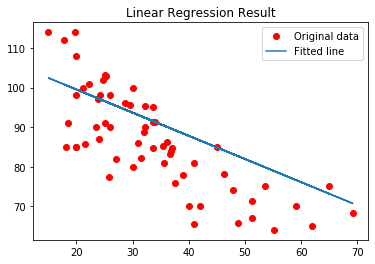

Amount of Time Taken: 13.18
Epoch 50 : cost = 52.766247 W = -0.5879802 b = 112.59371
Epoch 100 : cost = 52.59564 W = -0.5846956 b = 112.4398
Epoch 150 : cost = 52.58234 W = -0.58446026 b = 112.42857
Epoch 200 : cost = 52.581123 W = -0.58443785 b = 112.42751
Epoch 250 : cost = 52.58102 W = -0.5844357 b = 112.427414
Epoch 300 : cost = 52.581036 W = -0.58443564 b = 112.427414
Training cost = 52.581036 Weight = -0.58443564 bias = 112.427414 



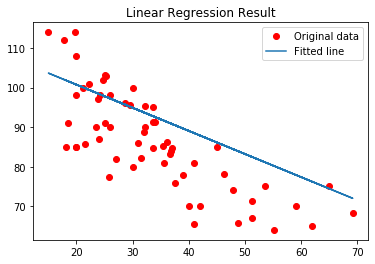

Amount of Time Taken: 14.34
Epoch 50 : cost = 30.621166 W = -0.81237864 b = 113.96714
Epoch 100 : cost = 30.620903 W = -0.8123484 b = 113.96435
Epoch 150 : cost = 30.62089 W = -0.8123472 b = 113.96418
Epoch 200 : cost = 30.620888 W = -0.81234705 b = 113.96418
Epoch 250 : cost = 30.620888 W = -0.81234705 b = 113.96418
Epoch 300 : cost = 30.62089 W = -0.81234694 b = 113.96418
Training cost = 30.62089 Weight = -0.81234694 bias = 113.96418 



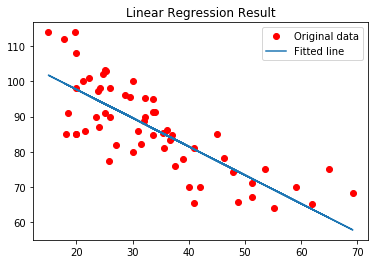

Amount of Time Taken: 15.86
Epoch 50 : cost = 45.5614 W = -0.585942 b = 111.2271
Epoch 100 : cost = 45.588123 W = -0.58573735 b = 111.22436
Epoch 150 : cost = 45.58918 W = -0.58573043 b = 111.2243
Epoch 200 : cost = 45.589127 W = -0.5857304 b = 111.22428
Epoch 250 : cost = 45.58914 W = -0.5857299 b = 111.224266
Epoch 300 : cost = 45.58913 W = -0.58572996 b = 111.224266
Training cost = 45.58913 Weight = -0.58572996 bias = 111.224266 



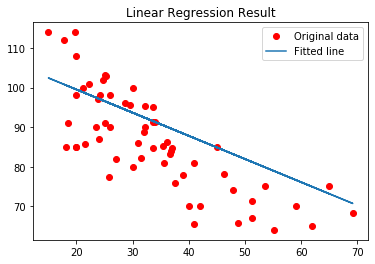

Amount of Time Taken: 13.90
Epoch 50 : cost = 53.454006 W = -0.60468256 b = 113.33995
Epoch 100 : cost = 52.652515 W = -0.58579516 b = 112.49135
Epoch 150 : cost = 52.587036 W = -0.5845423 b = 112.432495
Epoch 200 : cost = 52.581684 W = -0.5844492 b = 112.42804
Epoch 250 : cost = 52.581024 W = -0.5844363 b = 112.42744
Epoch 300 : cost = 52.58105 W = -0.5844362 b = 112.42744
Training cost = 52.58105 Weight = -0.5844362 bias = 112.42744 



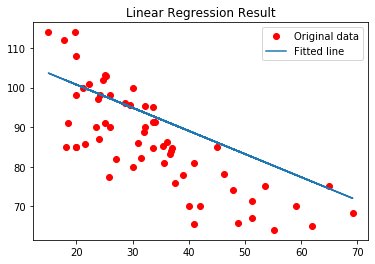

Amount of Time Taken: 14.39
Epoch 50 : cost = 30.63021 W = -0.8118015 b = 114.06447
Epoch 100 : cost = 30.621008 W = -0.8123417 b = 113.96726
Epoch 150 : cost = 30.620888 W = -0.8123465 b = 113.96431
Epoch 200 : cost = 30.620892 W = -0.8123469 b = 113.96417
Epoch 250 : cost = 30.620888 W = -0.81234664 b = 113.96418
Epoch 300 : cost = 30.620888 W = -0.8123467 b = 113.96418
Training cost = 30.620888 Weight = -0.8123467 bias = 113.96418 



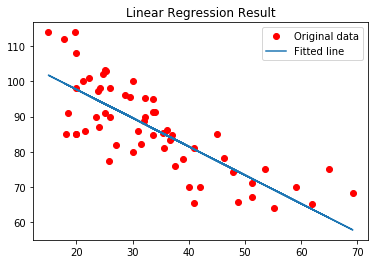

Amount of Time Taken: 14.29
Epoch 50 : cost = 45.566444 W = -0.58617777 b = 111.23749
Epoch 100 : cost = 45.58826 W = -0.5857437 b = 111.22464
Epoch 150 : cost = 45.589294 W = -0.58573085 b = 111.224335
Epoch 200 : cost = 45.58916 W = -0.58573014 b = 111.22428
Epoch 250 : cost = 45.58913 W = -0.58572996 b = 111.224266
Epoch 300 : cost = 45.58915 W = -0.58572966 b = 111.22426
Training cost = 45.58915 Weight = -0.58572966 bias = 111.22426 



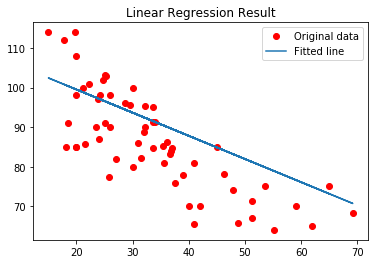

Amount of Time Taken: 14.08
Epoch 50 : cost = 54.10721 W = -0.63004744 b = 114.39233
Epoch 100 : cost = 52.715874 W = -0.5872841 b = 112.55886
Epoch 150 : cost = 52.592422 W = -0.5846418 b = 112.4372
Epoch 200 : cost = 52.58206 W = -0.5844567 b = 112.42839
Epoch 250 : cost = 52.581104 W = -0.58443713 b = 112.42748
Epoch 300 : cost = 52.58105 W = -0.5844362 b = 112.42744
Training cost = 52.58105 Weight = -0.5844362 bias = 112.42744 



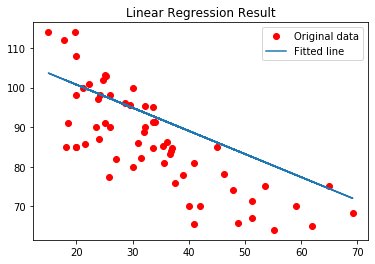

Amount of Time Taken: 14.21
Epoch 50 : cost = 30.655693 W = -0.8101024 b = 114.15467
Epoch 100 : cost = 30.621183 W = -0.81233025 b = 113.97145
Epoch 150 : cost = 30.620895 W = -0.81234664 b = 113.96432
Epoch 200 : cost = 30.620884 W = -0.81234705 b = 113.96417
Epoch 250 : cost = 30.620888 W = -0.81234705 b = 113.96418
Epoch 300 : cost = 30.62089 W = -0.81234694 b = 113.96418
Training cost = 30.62089 Weight = -0.81234694 bias = 113.96418 



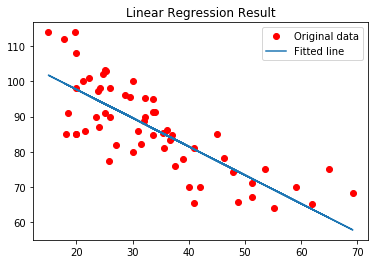

Amount of Time Taken: 15.35
Epoch 50 : cost = 45.558735 W = -0.5871515 b = 111.27462
Epoch 100 : cost = 45.589005 W = -0.5857636 b = 111.22558
Epoch 150 : cost = 45.589577 W = -0.5857313 b = 111.22441
Epoch 200 : cost = 45.589153 W = -0.58573043 b = 111.22429
Epoch 250 : cost = 45.589115 W = -0.58573 b = 111.224266
Epoch 300 : cost = 45.589115 W = -0.58573 b = 111.224266
Training cost = 45.589115 Weight = -0.58573 bias = 111.224266 



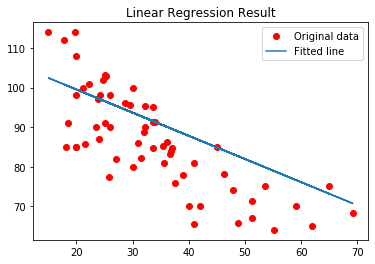

Amount of Time Taken: 14.72
Epoch 50 : cost = 52.773384 W = -0.5881275 b = 112.60052
Epoch 100 : cost = 52.596214 W = -0.5847048 b = 112.44025
Epoch 150 : cost = 52.58236 W = -0.584461 b = 112.428604
Epoch 200 : cost = 52.581142 W = -0.58443797 b = 112.42752
Epoch 250 : cost = 52.58102 W = -0.5844357 b = 112.427414
Epoch 300 : cost = 52.581036 W = -0.58443564 b = 112.427414
Training cost = 52.581036 Weight = -0.58443564 bias = 112.427414 



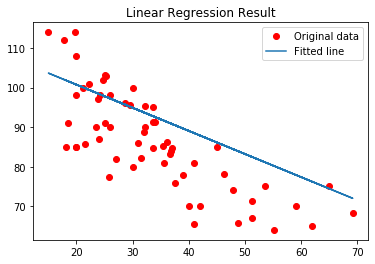

Amount of Time Taken: 15.37
Epoch 50 : cost = 30.621185 W = -0.81237745 b = 113.96761
Epoch 100 : cost = 30.620903 W = -0.8123486 b = 113.96434
Epoch 150 : cost = 30.62089 W = -0.8123472 b = 113.96418
Epoch 200 : cost = 30.620888 W = -0.81234705 b = 113.96418
Epoch 250 : cost = 30.620888 W = -0.81234705 b = 113.96418
Epoch 300 : cost = 30.62089 W = -0.81234694 b = 113.96418
Training cost = 30.62089 Weight = -0.81234694 bias = 113.96418 



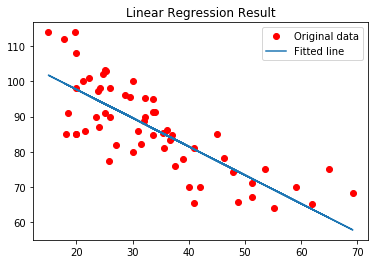

Amount of Time Taken: 15.03
Epoch 50 : cost = 45.5619 W = -0.5859475 b = 111.22742
Epoch 100 : cost = 45.58816 W = -0.5857381 b = 111.224396
Epoch 150 : cost = 45.589104 W = -0.58573043 b = 111.22428
Epoch 200 : cost = 45.589127 W = -0.5857304 b = 111.22428
Epoch 250 : cost = 45.58914 W = -0.5857299 b = 111.224266
Epoch 300 : cost = 45.58913 W = -0.58572996 b = 111.224266
Training cost = 45.58913 Weight = -0.58572996 bias = 111.224266 



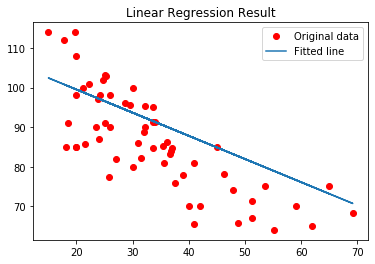

Amount of Time Taken: 14.10
Epoch 50 : cost = 53.45932 W = -0.60483503 b = 113.34656
Epoch 100 : cost = 52.65303 W = -0.5858057 b = 112.49184
Epoch 150 : cost = 52.587044 W = -0.5845434 b = 112.43254
Epoch 200 : cost = 52.581684 W = -0.5844492 b = 112.42804
Epoch 250 : cost = 52.581024 W = -0.5844363 b = 112.42744
Epoch 300 : cost = 52.58105 W = -0.5844362 b = 112.42744
Training cost = 52.58105 Weight = -0.5844362 bias = 112.42744 



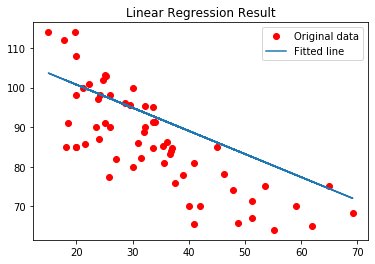

Amount of Time Taken: 14.52
Epoch 50 : cost = 30.630354 W = -0.8117909 b = 114.06536
Epoch 100 : cost = 30.621014 W = -0.81234133 b = 113.9673
Epoch 150 : cost = 30.620895 W = -0.8123467 b = 113.96431
Epoch 200 : cost = 30.620884 W = -0.81234694 b = 113.96417
Epoch 250 : cost = 30.620888 W = -0.81234664 b = 113.96418
Epoch 300 : cost = 30.620888 W = -0.8123467 b = 113.96418
Training cost = 30.620888 Weight = -0.8123467 bias = 113.96418 



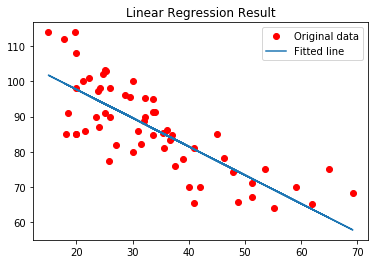

Amount of Time Taken: 14.50
Epoch 50 : cost = 45.566525 W = -0.5861862 b = 111.23784
Epoch 100 : cost = 45.588356 W = -0.585744 b = 111.22467
Epoch 150 : cost = 45.58934 W = -0.5857308 b = 111.22434
Epoch 200 : cost = 45.58916 W = -0.58573014 b = 111.22428
Epoch 250 : cost = 45.58913 W = -0.58572996 b = 111.224266
Epoch 300 : cost = 45.58915 W = -0.58572966 b = 111.22426
Training cost = 45.58915 Weight = -0.58572966 bias = 111.22426 



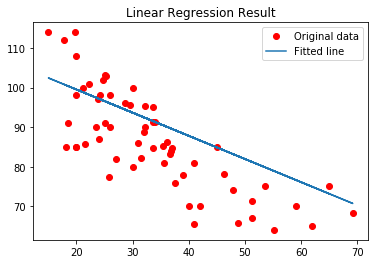

Amount of Time Taken: 14.61
Epoch 50 : cost = 54.104202 W = -0.6298961 b = 114.386246
Epoch 100 : cost = 52.71566 W = -0.58727807 b = 112.55859
Epoch 150 : cost = 52.59242 W = -0.5846414 b = 112.43719
Epoch 200 : cost = 52.58206 W = -0.5844567 b = 112.42839
Epoch 250 : cost = 52.581104 W = -0.58443713 b = 112.42748
Epoch 300 : cost = 52.58105 W = -0.5844362 b = 112.42744
Training cost = 52.58105 Weight = -0.5844362 bias = 112.42744 



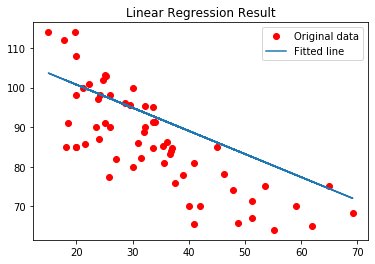

Amount of Time Taken: 14.37
Epoch 50 : cost = 30.655977 W = -0.81008375 b = 114.15528
Epoch 100 : cost = 30.621178 W = -0.81233037 b = 113.97146
Epoch 150 : cost = 30.620897 W = -0.8123466 b = 113.96432
Epoch 200 : cost = 30.620884 W = -0.81234705 b = 113.96417
Epoch 250 : cost = 30.620888 W = -0.81234705 b = 113.96418
Epoch 300 : cost = 30.62089 W = -0.81234694 b = 113.96418
Training cost = 30.62089 Weight = -0.81234694 bias = 113.96418 



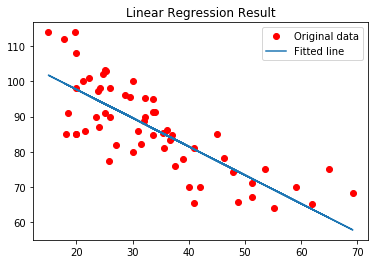

Amount of Time Taken: 15.07
Epoch 50 : cost = 45.55171 W = -0.58738804 b = 111.28259
Epoch 100 : cost = 45.58908 W = -0.58576816 b = 111.22578
Epoch 150 : cost = 45.589592 W = -0.5857312 b = 111.22441
Epoch 200 : cost = 45.58919 W = -0.5857302 b = 111.22429
Epoch 250 : cost = 45.589115 W = -0.58573 b = 111.224266
Epoch 300 : cost = 45.589115 W = -0.58573 b = 111.224266
Training cost = 45.589115 Weight = -0.58573 bias = 111.224266 



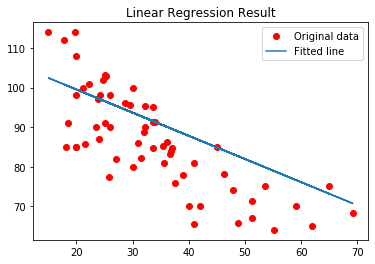

Amount of Time Taken: 15.41
Epoch 50 : cost = 52.779816 W = -0.5882672 b = 112.60692
Epoch 100 : cost = 52.596706 W = -0.5847135 b = 112.44066
Epoch 150 : cost = 52.582436 W = -0.5844616 b = 112.42864
Epoch 200 : cost = 52.581142 W = -0.58443797 b = 112.42752
Epoch 250 : cost = 52.58102 W = -0.5844357 b = 112.427414
Epoch 300 : cost = 52.581036 W = -0.58443564 b = 112.427414
Training cost = 52.581036 Weight = -0.58443564 bias = 112.427414 



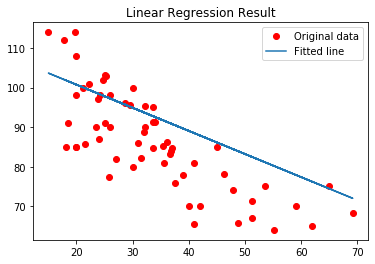

Amount of Time Taken: 15.07
Epoch 50 : cost = 30.6212 W = -0.8123761 b = 113.96806
Epoch 100 : cost = 30.62091 W = -0.81234825 b = 113.964355
Epoch 150 : cost = 30.62089 W = -0.81234694 b = 113.96418
Epoch 200 : cost = 30.620888 W = -0.81234705 b = 113.96418
Epoch 250 : cost = 30.620888 W = -0.81234705 b = 113.96418
Epoch 300 : cost = 30.62089 W = -0.81234694 b = 113.96418
Training cost = 30.62089 Weight = -0.81234694 bias = 113.96418 



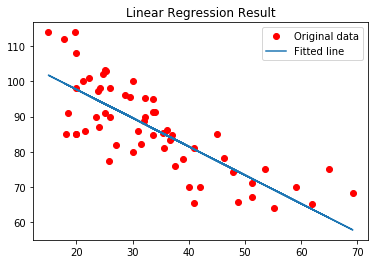

Amount of Time Taken: 15.84
Epoch 50 : cost = 45.56191 W = -0.5859511 b = 111.22756
Epoch 100 : cost = 45.58816 W = -0.5857381 b = 111.224396
Epoch 150 : cost = 45.58908 W = -0.5857308 b = 111.22429
Epoch 200 : cost = 45.58916 W = -0.58573014 b = 111.22428
Epoch 250 : cost = 45.58914 W = -0.5857299 b = 111.224266
Epoch 300 : cost = 45.58913 W = -0.58572996 b = 111.224266
Training cost = 45.58913 Weight = -0.58572996 bias = 111.224266 



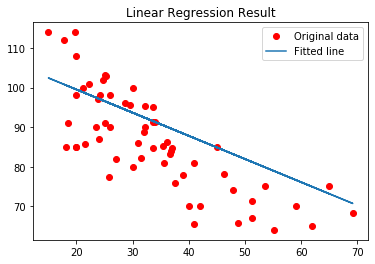

Amount of Time Taken: 16.53
Epoch 50 : cost = 53.465816 W = -0.60503685 b = 113.35522
Epoch 100 : cost = 52.653576 W = -0.5858177 b = 112.492386
Epoch 150 : cost = 52.587112 W = -0.58454335 b = 112.43255
Epoch 200 : cost = 52.58167 W = -0.5844494 b = 112.42805
Epoch 250 : cost = 52.581024 W = -0.5844363 b = 112.42744
Epoch 300 : cost = 52.58105 W = -0.5844362 b = 112.42744
Training cost = 52.58105 Weight = -0.5844362 bias = 112.42744 



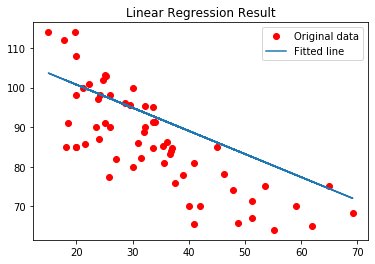

Amount of Time Taken: 15.68
Epoch 50 : cost = 30.63054 W = -0.81178 b = 114.0665
Epoch 100 : cost = 30.621012 W = -0.8123412 b = 113.96734
Epoch 150 : cost = 30.620892 W = -0.81234646 b = 113.96431
Epoch 200 : cost = 30.620892 W = -0.8123469 b = 113.96417
Epoch 250 : cost = 30.620888 W = -0.81234664 b = 113.96418
Epoch 300 : cost = 30.620888 W = -0.8123467 b = 113.96418
Training cost = 30.620888 Weight = -0.8123467 bias = 113.96418 



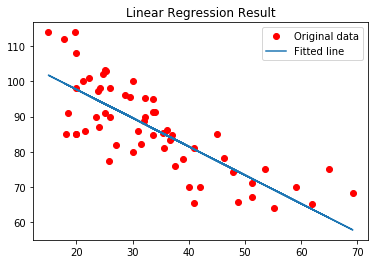

Amount of Time Taken: 14.95
Epoch 50 : cost = 45.566692 W = -0.5861914 b = 111.23808
Epoch 100 : cost = 45.588417 W = -0.58574414 b = 111.224686
Epoch 150 : cost = 45.58934 W = -0.5857308 b = 111.22434
Epoch 200 : cost = 45.58916 W = -0.58573014 b = 111.22428
Epoch 250 : cost = 45.58913 W = -0.58572996 b = 111.224266
Epoch 300 : cost = 45.58915 W = -0.58572966 b = 111.22426
Training cost = 45.58915 Weight = -0.58572966 bias = 111.22426 



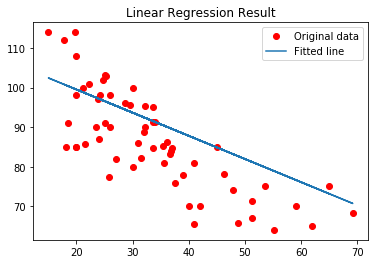

Amount of Time Taken: 14.88
Epoch 50 : cost = 54.102745 W = -0.6298247 b = 114.38337
Epoch 100 : cost = 52.715324 W = -0.5872711 b = 112.55827
Epoch 150 : cost = 52.592396 W = -0.5846411 b = 112.43717
Epoch 200 : cost = 52.58206 W = -0.5844567 b = 112.42839
Epoch 250 : cost = 52.581104 W = -0.58443713 b = 112.42748
Epoch 300 : cost = 52.58105 W = -0.5844362 b = 112.42744
Training cost = 52.58105 Weight = -0.5844362 bias = 112.42744 



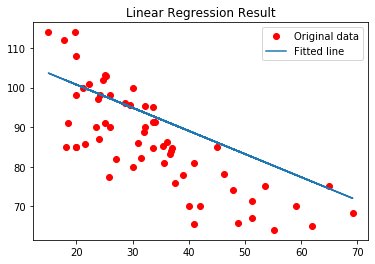

Amount of Time Taken: 16.18
Epoch 50 : cost = 30.656324 W = -0.8100619 b = 114.15601
Epoch 100 : cost = 30.621187 W = -0.8123306 b = 113.971535
Epoch 150 : cost = 30.620897 W = -0.8123465 b = 113.96432
Epoch 200 : cost = 30.620884 W = -0.81234705 b = 113.96417
Epoch 250 : cost = 30.620888 W = -0.81234664 b = 113.96418
Epoch 300 : cost = 30.620888 W = -0.8123467 b = 113.96418
Training cost = 30.620888 Weight = -0.8123467 bias = 113.96418 



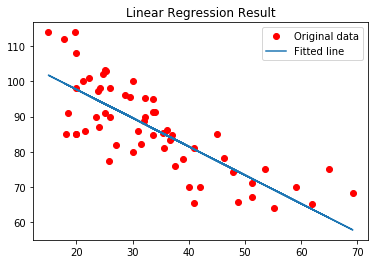

Amount of Time Taken: 15.73
Epoch 50 : cost = 45.535923 W = -0.58778936 b = 111.29534
Epoch 100 : cost = 45.589375 W = -0.58577496 b = 111.226105
Epoch 150 : cost = 45.5895 W = -0.5857311 b = 111.22439
Epoch 200 : cost = 45.58919 W = -0.5857302 b = 111.22429
Epoch 250 : cost = 45.589115 W = -0.58573 b = 111.224266
Epoch 300 : cost = 45.589115 W = -0.58573 b = 111.224266
Training cost = 45.589115 Weight = -0.58573 bias = 111.224266 



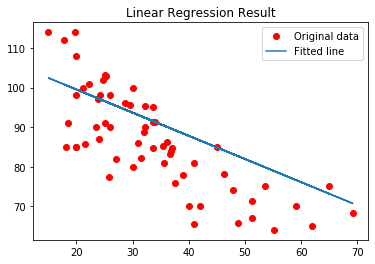

Amount of Time Taken: 15.10


In [0]:
for i in [1.15, -1.25, -1.35, -1.45, -1.55]:
    for j in [1, 1.1, 1.2]:
        for lr in [0.1, 0.3, 0.5]:

            start = time.time()
            Weight_normal,Bias_normal =  Training(x_normal,y_normal,learning_rate = lr,Mode='Normal',training_epochs = 300,Initialise=False,m=i,c=j)
            end = time.time()
            print('Amount of Time Taken: %.2f' % (end-start))